In [43]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
%matplotlib inline

from pandas_datareader import data as pdr
yf.pdr_override() # <== that's all it takes :-)

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pd.set_option('display.max_rows', None)

## Load Data and Create Stock Table

In [13]:
# Load and put stock data to df w pandas_datareader
stock = pdr.get_data_yahoo("^DJI", start="1980-01-01", end="2020-02-29")
stock['Date']=stock.index


[*********************100%***********************]  1 of 1 completed


In [14]:
stock['Date'] = pd.to_datetime(stock.index)

# create yr,month,day cols
stock['year'] = pd.DatetimeIndex(stock['Date']).year
stock['month'] = pd.DatetimeIndex(stock['Date']).month
stock['day'] = pd.DatetimeIndex(stock['Date']).day
stock['CPI_Multiplier_temp'] = 0.0

# reduce stock df
stockr=stock[['Close','year','month','CPI_Multiplier_temp','Date']]

## Adjust for Inflation

In [15]:
# load inflation data
inflation = pd.read_csv('inflation_data.csv')

inflation.rename(columns={'CPIAUCNS':'CPI','DATE':'date'},inplace=True)
# create index multiplier
inflation['CPI_Multiplier'] = inflation['CPI'].iloc[-1] / inflation['CPI']

# create yr,month,day cols
inflation['year'] = pd.DatetimeIndex(inflation['date']).year
inflation['month'] = pd.DatetimeIndex(inflation['date']).month
inflation['day'] = 1
inflation.index=inflation['date']


In [16]:
# Create Matrix With Inflation Adjusted Prices
count=0
for idx_stock, row_stock in stockr.iterrows():
    temp=inflation.loc[(inflation['year'] == int(row_stock['year'])) & (inflation['month'] ==  int(row_stock['month']))]
    stockr['CPI_Multiplier_temp'][count]=temp['CPI_Multiplier'][0]
    count+=1

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [17]:
stockr['Inflation_Adjusted_Close']=stockr['Close']*stockr['CPI_Multiplier_temp']

stock_fin=stockr[['Close','CPI_Multiplier_temp','Inflation_Adjusted_Close','Date']]
stock_fin.rename(columns={'CPI_Multiplier_temp':'CPI_Multiplier'},inplace=True)
stock_fin.head()

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Close,CPI_Multiplier,Inflation_Adjusted_Close,Date
Date,,,,
1985-01-29,1292.619995,2.451924,3169.406209,1985-01-29
1985-01-30,1287.880005,2.451924,3157.784113,1985-01-30
1985-01-31,1286.770020,2.451924,3155.062513,1985-01-31
1985-02-01,1277.719971,2.440358,3118.094779,1985-02-01
1985-02-04,1290.079956,2.440358,3148.257574,1985-02-04


In [18]:
#fig1 = plt.figure(figsize=(15,10),dpi=400)
#plt.xlabel('Date')
#plt.ylabel('Price ($)')
#plt.title('DowJones Value')
#plt.plot(stock_fin[['Close']])
#plt.grid(c='grey')
#plt.xticks(rotation=45)


## Visualization

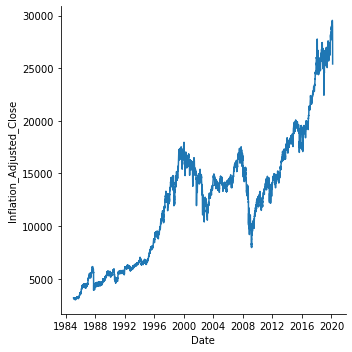

In [19]:
sns.relplot(x='Date',y='Inflation_Adjusted_Close',kind='line',data=stock_fin)

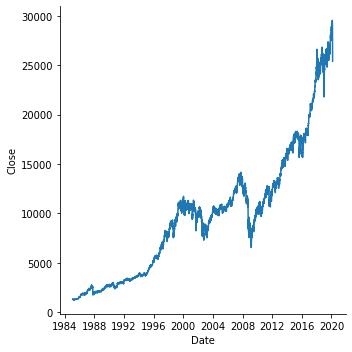

In [9]:
sns.relplot(x='Date',y='Close',kind='line',data=stock_fin)

## Fit ^DJI Data 

In [24]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [40]:
X=stock_fin[['Date']]
Y=stock_fin['Inflation_Adjusted_Close']
f=lm.fit(X,Y)
print('intercept:',lm.intercept_,'\n    coeff:',lm.coef_)

intercept: -5156.189658796007 
    coeff: [1.73547898e-14]


In [46]:
b=lm.intercept_
a=lm.coef_
np.polyfit(X,Y,2)

UFuncTypeError: ufunc 'add' cannot use operands with types dtype('<M8[ns]') and dtype('float64')